

<img src="https://saas.ulb.ac.be/wp-content/uploads/2016/09/logo_ulb.png" alt="Drawing" width="300"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# INFO-F422 Statistical Foundations for Machine Learning - Regression algorithms

<br>
<br>
<br>
<br>
<br>
<br>
    
**Name**: Erick Escobar Gallardo


**Student-code**: 000489309

**University**: ULB


# **Regression - Real datasets**


In [3]:
#Common libs
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math

# **Regression - Syntetic datasets**

In [19]:
def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    from sympy import sympify
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)

In [20]:
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result

In [21]:
def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    import numpy as np
    from sympy import Symbol,sympify
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [54]:
from sklearn.datasets import make_regression

In [55]:
X, y, coef = make_regression(n_samples=1000, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

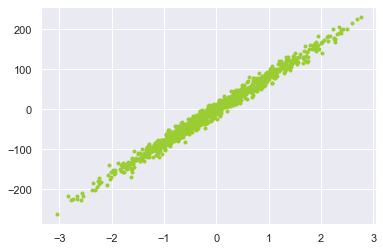

In [56]:
plt.scatter(X, y, color='yellowgreen', marker='.',
            label='Inliers')

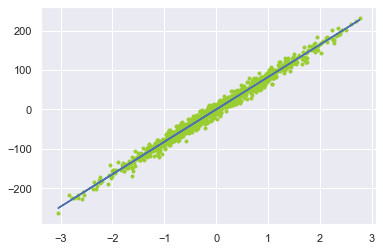

In [58]:
lin_reg.fit(X, y)
plt.plot(X, lin_reg.predict(X), color='b')
plt.scatter(X,y,color='yellowgreen', marker='.')

$1.7 x^{2}+1.5 x+9+f_{\text {noise}}(x | N=12)$

          0                 1
0 -0.116643  13.6219016989136
1   1.00281  21.3954495997647
2 -0.353151  6.42555720428522
3   3.13382  92.9778815335092
4   -1.2708  13.7082475533032
           0                 1
402 -17.1484  1984.07721192060
654 -15.5356  1623.79496128682
326  -14.611  1428.52829171809
821 -14.3799  1387.51755293734
944 -14.2963  1364.04123163666


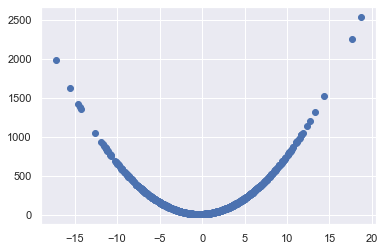

(1000, 1)
(1000,)


In [110]:
x=gen_regression_symbolic(m='1.7*x**2+1.5*x+9',n_samples=1000,noise=2)
df=pd.DataFrame(x)
print(df.head())
df = df.sort_values(df.columns[0]) 
print(df.head())
X= df.iloc[:, 0:1]
y= df.iloc[:, 1]
plt.scatter(X,y)
plt.show()
print(X.shape)
print(y.shape)

In [111]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

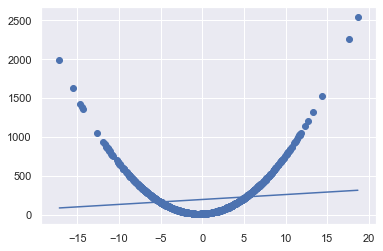

In [112]:
plt.plot(X, lin_reg.predict(X), color='b')
plt.scatter(X,y)

In [113]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)


In [114]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)

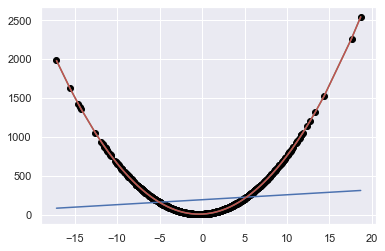

In [116]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')
plt.show()